In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as Sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neural_network import MLPClassifier

In [3]:
# Importing the dataset
df1 = pd.read_csv('sgemm_product.csv')

In [5]:
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
df1["avg_run"] = df1.iloc[:,14:].mean(axis=1)
df1["log_avg_run"] = np.log(df1.avg_run) 
df1.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis = 1, inplace = True)

In [7]:
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run,log_avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,4.756775
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,4.365707
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,4.389064
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,4.461733
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,4.776283


In [8]:
df1.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run,log_avg_run
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.571953,4.623068
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,368.750161,1.128530
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.317500,2.589079
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.667500,3.705429
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.790000,4.245491
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.387500,5.431044
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3341.507500,8.114177


In [5]:
df1.drop(['avg_run'], axis = 1, inplace = True)

In [6]:
df1.log_avg_run.median()

4.245490733029061

In [7]:
true_false = df1.log_avg_run > 4.245490
values = true_false.value_counts()
print(values)

True     120802
False    120798
Name: log_avg_run, dtype: int64


In [8]:
Y = df1['log_avg_run'].apply(lambda x : 0 if x <= 4.245490 else 1)
Y.value_counts()

1    120802
0    120798
Name: log_avg_run, dtype: int64

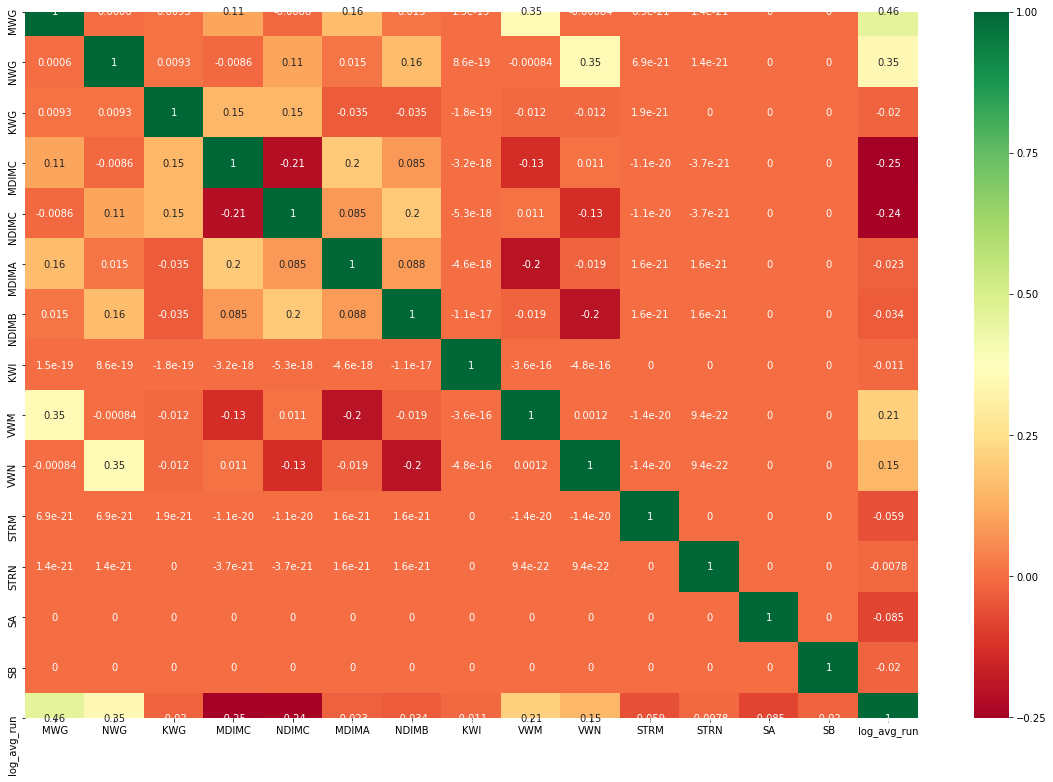

In [13]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,13))
g=Sb.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
#Checking for missing values
df1.isnull().sum()

MWG            0
NWG            0
KWG            0
MDIMC          0
NDIMC          0
MDIMA          0
NDIMB          0
KWI            0
VWM            0
VWN            0
STRM           0
STRN           0
SA             0
SB             0
log_avg_run    0
dtype: int64

In [9]:
X1 = df1.iloc[:,1:14]
Y1 = Y

In [10]:
# scaling for SVM
X_sc = X1.copy()
std_sc = StandardScaler()
X_sc = std_sc.fit_transform(X_sc)

# EDA for Dataset 2

In [24]:
df2 = pd.read_csv('adult.csv')

In [71]:
df2.head()

,Age,Work class,fnlwgt,Education,Edu-num,Marital status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [72]:
df2.describe()

,Age,fnlwgt,Edu-num,capital-gain,capital-loss,hours-per-week,Salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [25]:
df2['Salary'].value_counts()

0    24720
1     7841
Name: Salary, dtype: int64

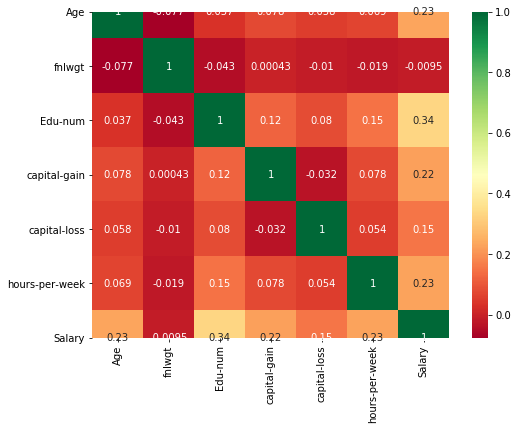

In [74]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,6))
g=Sb.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
X_adt = df2.iloc[:,0:14]
Y_adt = df2['Salary']

In [76]:
#Checking for missing values
df2.isnull().sum()

Age               0
Work class        0
fnlwgt            0
Education         0
Edu-num           0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [27]:
# Finding categorical data columns
obj_df = df2.select_dtypes(include=['object']).copy()
obj_df.head()

,Work class,Education,Marital status,Occupation,Relationship,Race,Sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [28]:
obj_df[obj_df.isnull().any(axis=1)]

,Work class,Education,Marital status,Occupation,Relationship,Race,Sex,native-country


In [29]:
# Encoding the categorical columns
obj_df["Work class"] = obj_df["Work class"].astype('category')
obj_df["WorkClass_cat"] = obj_df["Work class"].cat.codes
obj_df["Education"] = obj_df["Education"].astype('category')
obj_df["Education_cat"] = obj_df["Education"].cat.codes
obj_df["Marital status"] = obj_df["Marital status"].astype('category')
obj_df["MaritalStatus_cat"] = obj_df["Marital status"].cat.codes
obj_df["Occupation"] = obj_df["Occupation"].astype('category')
obj_df["Occupation_cat"] = obj_df["Occupation"].cat.codes
obj_df["Relationship"] = obj_df["Relationship"].astype('category')
obj_df["Relationship_cat"] = obj_df["Relationship"].cat.codes
obj_df["Race"] = obj_df["Race"].astype('category')
obj_df["Race_cat"] = obj_df["Race"].cat.codes
obj_df["Sex"] = obj_df["Sex"].astype('category')
obj_df["Sex_cat"] = obj_df["Sex"].cat.codes
obj_df["native-country"] = obj_df["native-country"].astype('category')
obj_df["NativeCountry_cat"] = obj_df["native-country"].cat.codes

In [30]:
#Adding the new encoded columns to dataset
df2['WorkClass_cat'] = obj_df['WorkClass_cat']
df2['Education_cat'] = obj_df['Education_cat']
df2['MaritalStatus_cat'] = obj_df['MaritalStatus_cat']
df2['Occupation_cat'] = obj_df['Occupation_cat']
df2['Relationship_cat'] = obj_df['Relationship_cat']
df2['Race_cat'] = obj_df['Race_cat']
df2['Sex_cat'] = obj_df['Sex_cat']
df2['NativeCountry_cat'] = obj_df['NativeCountry_cat']
df2.drop(['Work class','Education','Marital status','Occupation','Relationship','Race','Sex','native-country'], axis = 1, inplace = True)

In [31]:
df2.head()
lst = ['Age','fnlwgt','Edu-num','capital-gain','capital-loss','hours-per-week','WorkClass_cat','Education_cat','MaritalStatus_cat','Occupation_cat','Relationship_cat','Race_cat','Sex_cat','NativeCountry_cat','Salary']
A_df = df2[lst]
A_df.head()

,Age,fnlwgt,Edu-num,capital-gain,capital-loss,hours-per-week,WorkClass_cat,Education_cat,MaritalStatus_cat,Occupation_cat,Relationship_cat,Race_cat,Sex_cat,NativeCountry_cat,Salary
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0


In [33]:
X_adt = A_df.iloc[:,0:14]
Y_adt = A_df['Salary']
X_adt.head()

,Age,fnlwgt,Edu-num,capital-gain,capital-loss,hours-per-week,WorkClass_cat,Education_cat,MaritalStatus_cat,Occupation_cat,Relationship_cat,Race_cat,Sex_cat,NativeCountry_cat
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5


In [34]:
X_sc_adt = X_adt.copy()
std_sc = StandardScaler()
X = std_sc.fit_transform(X_sc_adt)

# ANN Dataset 1

In [11]:
X_train_1 ,X_test_1, y_train_1 , y_test_1 = train_test_split(X_sc, Y1, test_size = 0.3 , random_state = 29)

In [60]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 200, random_state=29)
    ANN.fit(X_train_1, y_train_1)
    y_pred_train = ANN.predict(X_train_1)
    y_pred_test = ANN.predict(X_test_1)
    train_accuracy.append(accuracy_score(y_train_1,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_1,y_pred_test))

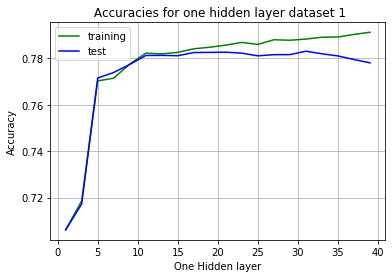

In [88]:
## Plotting the graph for one hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title(" Accuracies for one hidden layer dataset 1")
plt.xlabel("One Hidden layer")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i,i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 300, random_state=29)
    ANN.fit(X_train_1, y_train_1)
    y_pred_train = ANN.predict(X_train_1)
    y_pred_test = ANN.predict(X_test_1)
    train_accuracy.append(accuracy_score(y_train_1,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_1,y_pred_test))

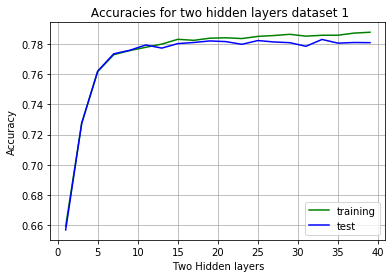

In [13]:
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title(" Accuracies for two hidden layers dataset 1")
plt.xlabel("Two Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i,i,i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 300, random_state=29)
    ANN.fit(X_train_1, y_train_1)
    y_pred_train = ANN.predict(X_train_1)
    y_pred_test = ANN.predict(X_test_1)
    train_accuracy.append(accuracy_score(y_train_1,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_1,y_pred_test))

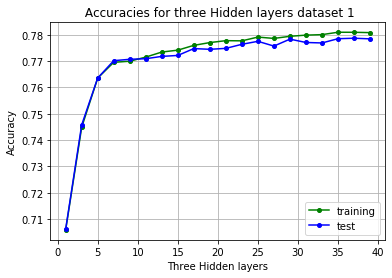

In [65]:
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title("Accuracies for three Hidden layers dataset 1")
plt.xlabel("Three Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [68]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i,i,i,i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 300, random_state=29)
    ANN.fit(X_train_1, y_train_1)
    y_pred_train = ANN.predict(X_train_1)
    y_pred_test = ANN.predict(X_test_1)
    train_accuracy.append(accuracy_score(y_train_1,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_1,y_pred_test))

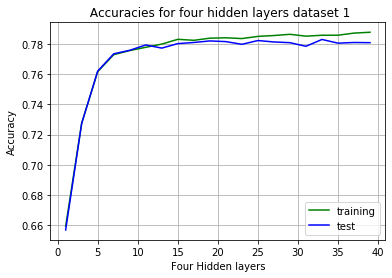

In [14]:
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title(" Accuracies for four hidden layers dataset 1")
plt.xlabel("Four Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
## Expermineting with differnet activation functions
activation_fun = ['identity', 'logistic', 'tanh', 'relu']
train_accuracy_actv = []
test_accuracy_actv = []
for i in activation_fun:
    ANN = MLPClassifier(hidden_layer_sizes= (20,20,20), max_iter = 400, activation=i, random_state=29)
    ANN.fit(X_train_1, y_train_1.ravel())
    y_pred_train = ANN.predict(X_train_1)
    y_pred_test = ANN.predict(X_test_1)
    train_accuracy_actv.append(accuracy_score(y_train_1,y_pred_train))
    test_accuracy_actv.append(accuracy_score(y_test_1,y_pred_test))

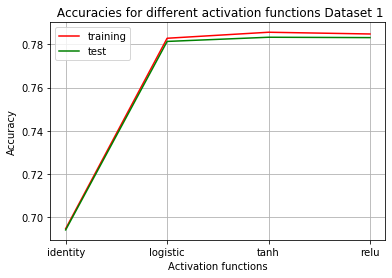

In [46]:
## Plotting the graph for the different activation functions
plt.plot(activation_fun,train_accuracy_actv,color='red',label='training')
plt.plot(activation_fun,test_accuracy_actv,color='green',label='test')
plt.title(" Accuracies for different activation functions Dataset 1")
plt.xlabel("Activation functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
## Expermineting with differnet solver functions
solver = ['lbfgs','sgd','adam']
train_accuracy_solv = []
test_accuracy_solv = []
for i in solver:
    ANN = MLPClassifier(hidden_layer_sizes= (20,20,20),activation='relu', max_iter = 400,solver=i,random_state=29)
    ANN.fit(X_train_1, y_train_1.ravel())
    y_pred_train = ANN.predict(X_train_1)
    y_pred_test = ANN.predict(X_test_1)
    train_accuracy_solv.append(accuracy_score(y_train_1,y_pred_train))
    test_accuracy_solv.append(accuracy_score(y_test_1,y_pred_test))

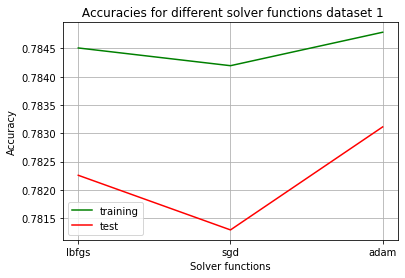

In [49]:
## Plotting the graph for the different solver functions
plt.plot(solver,train_accuracy_solv,color='green',label='training')
plt.plot(solver,test_accuracy_solv,color='red',label='test')
plt.title(" Accuracies for different solver functions dataset 1")
plt.xlabel("Solver functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
## Expermineting with differnet Alpha values
alpha = [0.0001,0.0002,0.0004,0.0006,0.0008,0.001]
acc_train_alpha = []
acc_test_alpha = []
for i in alpha:
    ANN = MLPClassifier(hidden_layer_sizes= (20,20,20),activation='relu',max_iter = 400,alpha=i,random_state=29)
    ANN.fit(X_train_1, y_train_1.ravel())
    y_pred_train = ANN.predict(X_train_1)
    y_pred_test = ANN.predict(X_test_1)
    acc_train_alpha.append(accuracy_score(y_train_1,y_pred_train))
    acc_test_alpha.append(accuracy_score(y_test_1,y_pred_test))

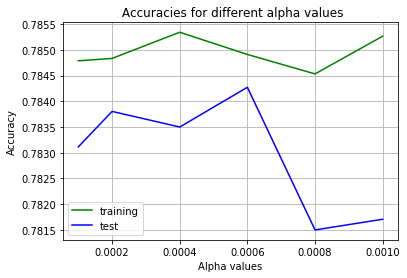

In [16]:
## Plotting the graph for the different alpha values
plt.plot(alpha,acc_train_alpha,color='green',label='training')
plt.plot(alpha,acc_test_alpha,color='blue',label='test')
plt.title(" Accuracies for different alpha values")
plt.xlabel("Alpha values")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
# Building the final classifier
ANN = MLPClassifier(hidden_layer_sizes= (20,20,20),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          alpha = 0.0006,
                          random_state= 0)

ANN.fit(X_train_1, y_train_1)

MLPClassifier(activation='relu', alpha=0.0006, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
### predicting the test set result
y_pred_1 = ANN.predict(X_test_1)
y_expect_1 = y_test_1

### Finding the accuracy
Result_1 = accuracy_score(y_expect_1, y_pred_1)
print(Result_1)

### create confusion matrix
cm_1 = confusion_matrix(y_test_1 , y_pred_1)
print(cm_1)

0.7831539735099338
[[29911  6345]
 [ 9372 26852]]


In [21]:
from sklearn.model_selection import cross_val_score
accuracies_1 = cross_val_score(estimator = ANN, X = X_train_1, y = y_train_1, cv = 10)
mean_acc_1 = accuracies_1.mean()
print(mean_acc_1)

0.7804872556655338


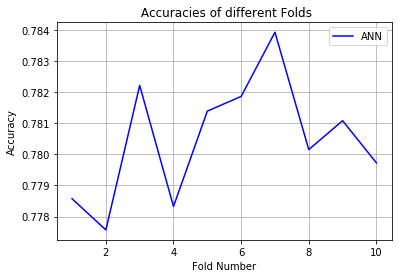

In [23]:
plt.plot(np.arange(1,11,1),accuracies_1,color = 'blue',label='ANN')
plt.title(" Accuracies of different Folds")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ANN for Dataset 2

In [36]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X,Y_adt,test_size = 0.3,random_state = 0)

In [89]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 300, random_state=29)
    ANN.fit(X_train_2, y_train_2)
    y_pred_train = ANN.predict(X_train_2)
    y_pred_test = ANN.predict(X_test_2)
    train_accuracy.append(accuracy_score(y_train_2,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_2,y_pred_test))

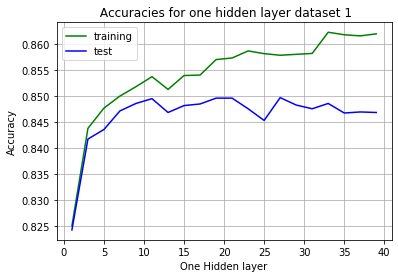

In [90]:
## Plotting the graph for one hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title(" Accuracies for one hidden layer dataset 2")
plt.xlabel("One Hidden layer")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [92]:
## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i,i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 400, random_state=29)
    ANN.fit(X_train_2, y_train_2)
    y_pred_train = ANN.predict(X_train_2)
    y_pred_test = ANN.predict(X_test_2)
    train_accuracy.append(accuracy_score(y_train_2,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_2,y_pred_test))

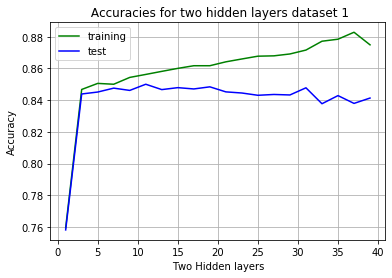

In [93]:
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title(" Accuracies for two hidden layers dataset 2")
plt.xlabel("Two Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [96]:
## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i,i,i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 600, random_state=29)
    ANN.fit(X_train_2, y_train_2)
    y_pred_train = ANN.predict(X_train_2)
    y_pred_test = ANN.predict(X_test_2)
    train_accuracy.append(accuracy_score(y_train_2,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_2,y_pred_test))

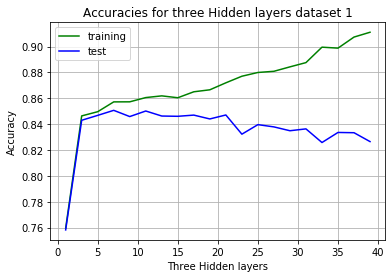

In [97]:
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title("Accuracies for three Hidden layers dataset 2")
plt.xlabel("Three Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [118]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet hidden layers
layer_size = np.arange(1,40,2)
train_accuracy = []
test_accuracy = []
for i in layer_size:
    ANN = MLPClassifier(hidden_layer_sizes= (i,i,i,i), activation='relu', alpha=0.0001, batch_size='auto',
                              solver= 'adam', learning_rate= 'constant', max_iter = 600, random_state=29)
    ANN.fit(X_train_2, y_train_2)
    y_pred_train = ANN.predict(X_train_2)
    y_pred_test = ANN.predict(X_test_2)
    train_accuracy.append(accuracy_score(y_train_2,y_pred_train))
    test_accuracy.append(accuracy_score(y_test_2,y_pred_test))

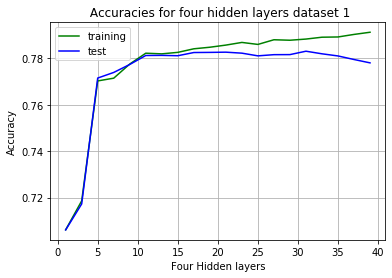

In [99]:
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,train_accuracy,color='green',label='training')
plt.plot(layer_size,test_accuracy,color='blue',label='test')
plt.title(" Accuracies for four hidden layers dataset 2")
plt.xlabel("Four Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
## Expermineting with differnet activation functions
activation_fun = ['identity', 'logistic', 'tanh', 'relu']
train_accuracy_actv = []
test_accuracy_actv = []
for i in activation_fun:
    ANN = MLPClassifier(hidden_layer_sizes= (20,20,20), max_iter = 500, activation=i, random_state=29)
    ANN.fit(X_train_2, y_train_2
    y_pred_train = ANN.predict(X_train_2)
    y_pred_test = ANN.predict(X_test_2)
    train_accuracy_actv.append(accuracy_score(y_train_2,y_pred_train))
    test_accuracy_actv.append(accuracy_score(y_test_2,y_pred_test))

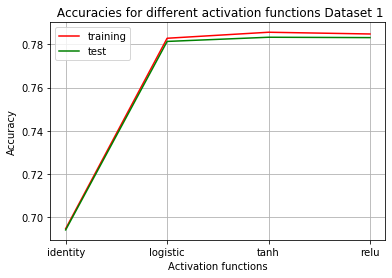

In [101]:
## Plotting the graph for the different activation functions
plt.plot(activation_fun,train_accuracy_actv,color='red',label='training')
plt.plot(activation_fun,test_accuracy_actv,color='green',label='test')
plt.title(" Accuracies for different activation functions Dataset 2")
plt.xlabel("Activation functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
## Expermineting with differnet solver functions
solver = ['lbfgs','sgd','adam']
train_accuracy_solv = []
test_accuracy_solv = []
for i in solver:
    ANN = MLPClassifier(hidden_layer_sizes= (20,20,20),activation='relu', max_iter = 500,solver=i,random_state=29)
    ANN.fit(X_train_2, y_train_2)
    y_pred_train = ANN.predict(X_train_2)
    y_pred_test = ANN.predict(X_test_2)
    train_accuracy_solv.append(accuracy_score(y_train_2,y_pred_train))
    test_accuracy_solv.append(accuracy_score(y_test_2,y_pred_test))

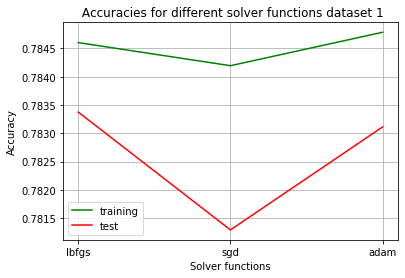

In [119]:
## Plotting the graph for the different solver functions
plt.plot(solver,train_accuracy_solv,color='green',label='training')
plt.plot(solver,test_accuracy_solv,color='red',label='test')
plt.title(" Accuracies for different solver functions dataset 2")
plt.xlabel("Solver functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [120]:
## Expermineting with differnet Alpha values
alpha = [0.0001,0.0002,0.0004,0.0006,0.0008,0.001]
acc_train_alpha = []
acc_test_alpha = []
for i in alpha:
    ANN = MLPClassifier(hidden_layer_sizes= (20,20,20),activation='relu',max_iter = 400,alpha=i,random_state=29)
    ANN.fit(X_train_2, y_train_2)
    y_pred_train = ANN.predict(X_train_2)
    y_pred_test = ANN.predict(X_test_2)
    acc_train_alpha.append(accuracy_score(y_train_2,y_pred_train))
    acc_test_alpha.append(accuracy_score(y_test_2,y_pred_test))

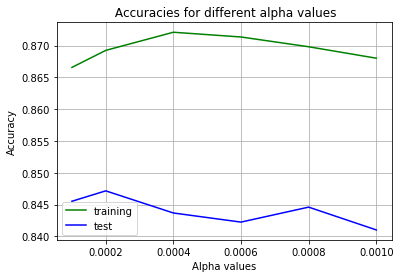

In [121]:
## Plotting the graph for the different alpha values
plt.plot(alpha,acc_train_alpha,color='green',label='training')
plt.plot(alpha,acc_test_alpha,color='blue',label='test')
plt.title(" Accuracies for different alpha values")
plt.xlabel("Alpha values")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
# Building the final classifier
ANN = MLPClassifier(hidden_layer_sizes= (20,20,20), activation='relu', alpha=0.0002, batch_size='auto', 
                                         solver= 'adam', learning_rate= 'constant', max_iter = 600, random_state=29)
ANN.fit(X_train_2, y_train_2)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=29, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
### predicting the test set result
y_pred_2 = ANN.predict(X_test_2)

### Finding the accuracy
Result_2 = accuracy_score(y_test_2, y_pred_2)
print(Result_2)

### create confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)

0.847169618179957
[[6818  589]
 [ 904 1458]]


In [41]:
from sklearn.model_selection import cross_val_score
accuracies_2 = cross_val_score(estimator = ANN, X = X_train_2, y = y_train_2, cv = 10)
mean_acc_2 = accuracies_2.mean()
print(mean_acc_2)

0.8430579869019172


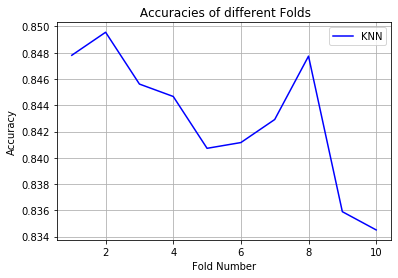

In [42]:
plt.plot(np.arange(1,11,1),accuracies_2,color = 'blue',label='KNN')
plt.title(" Accuracies of different Folds")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# KNN for dataset 1

In [15]:
X_train_1 ,X_test_1, y_train_1 , y_test_1 = train_test_split(X_sc, Y1, test_size = 0.33, random_state = 0)

In [25]:
#  Varying the "p" value - Distance Metric 
p = np.arange(1,5,1)
train_acc = []
test_acc = []
for i in p:
    KNN = KNeighborsClassifier(n_neighbors=5, p = i)
    KNN.fit(X_train_1, y_train_1)
    y_pred_train = KNN.predict(X_train_1)
    y_pred_test = KNN.predict(X_test_1)
    train_acc.append(accuracy_score(y_train_1,y_pred_train))
    test_acc.append(accuracy_score(y_test_1,y_pred_test))

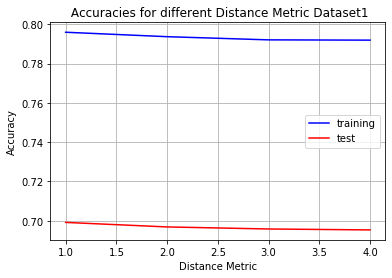

In [129]:
## Plotting the graph for the different degrees of polynomial
plt.plot(p,train_acc,color='blue',label='training')
plt.plot(p,test_acc,color='red',label='test')
plt.title(" Accuracies for different Distance Metric Dataset1")
plt.xlabel("Distance Metric")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [130]:
# Varying the Neighbor values in the classifier for p=2
n_neighbors = np.arange(1,21,1)
train_acc = []
test_acc = []
for i in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=i, p = 2)
    KNN.fit(X_train_1, y_train_1)
    y_pred_train = KNN.predict(X_train_1)
    y_pred_test = KNN.predict(X_test_1)
    train_acc.append(accuracy_score(y_train_1,y_pred_train))
    test_acc.append(accuracy_score(y_test_1,y_pred_test))

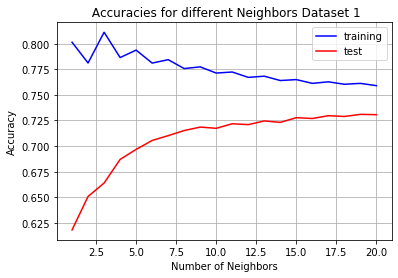

In [131]:
## Plotting the graph for the different Neighbors with p=1 
plt.plot(n_neighbors,train_acc,color='blue',label='training')
plt.plot(n_neighbors,test_acc,color='red',label='test')
plt.title(" Accuracies for different Neighbors Dataset 1")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [132]:
# Varying the "weight" parameter
weight = ['uniform','distance']
train_weight = []
test_weight = []
for i in weight:
    KNN = KNeighborsClassifier(n_neighbors=6,p = 2,weights= i)
    KNN.fit(X_train_1, y_train_1)
    y_pred_train = KNN.predict(X_train_1)
    y_pred_test = KNN.predict(X_test_1)
    train_weight.append(accuracy_score(y_train_1,y_pred_train))
    test_weight.append(accuracy_score(y_test_1,y_pred_test))

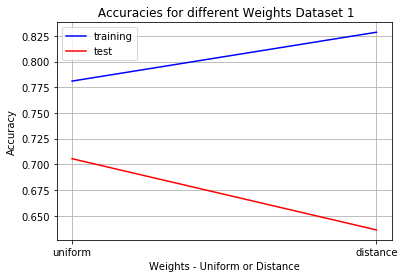

In [133]:
## Plotting the graph for the different Neighbors with p=2 
plt.plot(weight,train_weight,color='blue',label='training')
plt.plot(weight,test_weight,color='red',label='test')
plt.title(" Accuracies for different Weights Dataset 1")
plt.xlabel("Weights - Uniform or Distance")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [136]:
algo = ['auto','ball_tree','kd_tree','brute']
train_algor = []
test_algor = []
for i in algo:
    KNN = KNeighborsClassifier(algorithm=i)
    KNN.fit(X_train_1, y_train_1)
    y_pred_train = KNN.predict(X_train_1)
    y_pred_test = KNN.predict(X_test_1)
    train_algor.append(accuracy_score(y_train_1,y_pred_train))
    test_algor.append(accuracy_score(y_test_1,y_pred_test))

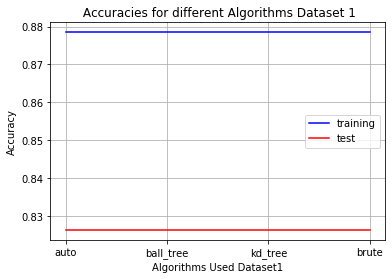

In [52]:
## Plotting the graph for the different Neighbors with p=2 
plt.plot(algo,train_algor,color='blue',label='training')
plt.plot(algo,test_algor,color='red',label='test')
plt.title(" Accuracies for different Algorithms Dataset 1")
plt.xlabel("Algorithms Used Dataset1")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
### building the classifier
KNN = KNeighborsClassifier(n_neighbors=15, p = 1, metric= 'minkowski')
KNN.fit(X_train_1, y_train_1)

### predicting the test set result
y_pred_1 = KNN.predict(X_test_1)

### Finding the accuracy
Result_1 = accuracy_score(y_test_1, y_pred_1)
print(Result_1)

0.7445063214930765


In [21]:
### create confusion matrix
cm_1 = confusion_matrix(y_test_1, y_pred_1)
print(cm_1)

[[30412  9578]
 [10792 28946]]


In [22]:
from sklearn.model_selection import cross_val_score
accuracies_1 = cross_val_score(estimator = KNN, X = X_train_1, y = y_train_1, cv = 10)
mean_acc_1 = accuracies_1.mean()
print(mean_acc_1)

0.7422283695257967


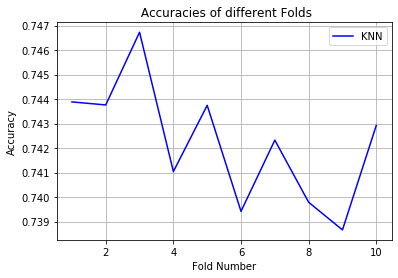

In [23]:
plt.plot(np.arange(1,11,1),accuracies_1,color = 'blue',label='KNN')
plt.title(" Accuracies of different Folds")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# KNN for Dataset 2

In [37]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X,Y_adt,test_size = 0.3,random_state = 0)

In [38]:
#  Varying the "p" value - Distance Metric 
p = np.arange(1,5,1)
train_acc = []
test_acc = []
for i in p:
    KNN = KNeighborsClassifier(n_neighbors=5, p = i)
    KNN.fit(X_train_2, y_train_2)
    y_pred_train = KNN.predict(X_train_2)
    y_pred_test = KNN.predict(X_test_2)
    train_acc.append(accuracy_score(y_train_2,y_pred_train))
    test_acc.append(accuracy_score(y_test_2,y_pred_test))

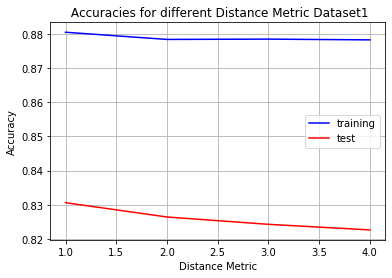

In [39]:
## Plotting the graph for the different degrees of polynomial
plt.plot(p,train_acc,color='blue',label='training')
plt.plot(p,test_acc,color='red',label='test')
plt.title(" Accuracies for different Distance Metric Dataset1")
plt.xlabel("Distance Metric")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
# Varying the Neighbor values in the classifier for p=2
n_neighbors = np.arange(1,21,1)
train_acc = []
test_acc = []
for i in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=i, p = 2)
    KNN.fit(X_train_2, y_train_2)
    y_pred_train = KNN.predict(X_train_2)
    y_pred_test = KNN.predict(X_test_2)
    train_acc.append(accuracy_score(y_train_2,y_pred_train))
    test_acc.append(accuracy_score(y_test_2,y_pred_test))

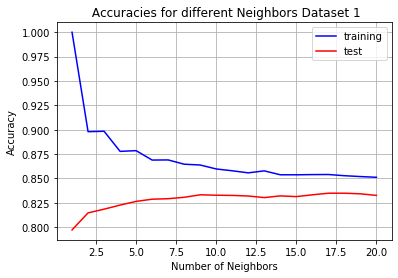

In [41]:
## Plotting the graph for the different Neighbors with p=1 
plt.plot(n_neighbors,train_acc,color='blue',label='training')
plt.plot(n_neighbors,test_acc,color='red',label='test')
plt.title(" Accuracies for different Neighbors Dataset 1")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
# Varying the "weight" parameter
weight = ['uniform','distance']
train_weight = []
test_weight = []
for i in weight:
    KNN = KNeighborsClassifier(n_neighbors=10,p = 2,weights= i)
    KNN.fit(X_train_2, y_train_2)
    y_pred_train = KNN.predict(X_train_2)
    y_pred_test = KNN.predict(X_test_2)
    train_weight.append(accuracy_score(y_train_2,y_pred_train))
    test_weight.append(accuracy_score(y_test_2,y_pred_test))

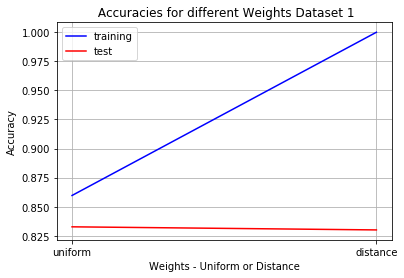

In [43]:
## Plotting the graph for the different Neighbors with p=2 
plt.plot(weight,train_weight,color='blue',label='training')
plt.plot(weight,test_weight,color='red',label='test')
plt.title(" Accuracies for different Weights Dataset 1")
plt.xlabel("Weights - Uniform or Distance")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
algo = ['auto','ball_tree','kd_tree','brute']
train_algor = []
test_algor = []
for i in algo:
    KNN = KNeighborsClassifier(algorithm=i)
    KNN.fit(X_train_2, y_train_2)
    y_pred_train = KNN.predict(X_train_2)
    y_pred_test = KNN.predict(X_test_2)
    train_algor.append(accuracy_score(y_train_2,y_pred_train))
    test_algor.append(accuracy_score(y_test_2,y_pred_test))

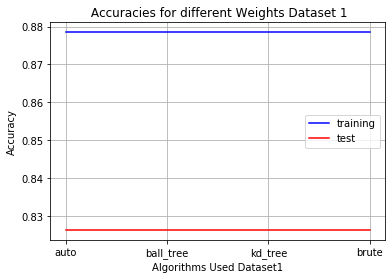

In [45]:
## Plotting the graph for the different Neighbors with p=2 
plt.plot(algo,train_algor,color='blue',label='training')
plt.plot(algo,test_algor,color='red',label='test')
plt.title(" Accuracies for different Weights Dataset 1")
plt.xlabel("Algorithms Used Dataset1")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
### building the classifier
KNN = KNeighborsClassifier(n_neighbors=10, p = 1, metric= 'minkowski')
KNN.fit(X_train_2, y_train_2)

### predicting the test set result
y_pred_2 = KNN.predict(X_test_2)

### Finding the accuracy
Result_2 = accuracy_score(y_test_2, y_pred_2)
print(Result_2)

0.8330433002354386


In [48]:
### create confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)

[[6899  508]
 [1123 1239]]


In [49]:
from sklearn.model_selection import cross_val_score
accuracies_2 = cross_val_score(estimator = KNN, X = X_train_2, y = y_train_2, cv = 10)
mean_acc_2 = accuracies_2.mean()
print(mean_acc_2)

0.837310968225856


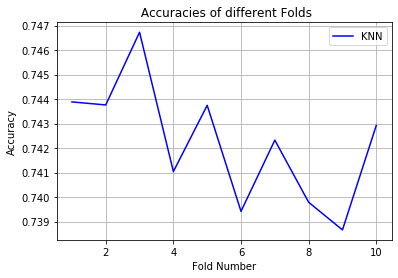

In [50]:
plt.plot(np.arange(1,11,1),accuracies_1,color = 'blue',label='KNN')
plt.title(" Accuracies of different Folds")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()